##**Nama** : Azisya Luthfi Bintang
##**NIM** : 2022071051
##**Matkul** : Desain Analisis Algoritma Pertemuan 10

---

In [32]:
pip install pulp

In [33]:
import pulp

In [34]:
model = pulp.LpProblem("ProfitMaximisingProblem", pulp.LpMaximize)

In [35]:
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [36]:
#Objective Function
model += 4200 * A + 2800 * B, "Profit"
# Constraints
model += 3 * A + 2 * B <= 20
model += 4 * A + 3 * B <= 30
model += 4 * A + 3 * B <= 44

In [37]:
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [38]:
print(A.varValue)
print(B.varValue)

6.0
1.0


In [39]:
print(pulp.value(model.objective))

28000.0


---

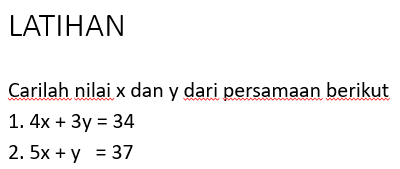

In [40]:
#Menghitung Linear Programming
def linearProgramming(a = 0, b = 0, c = 0):
  model1 = pulp.LpProblem("ProfitMaximisingProblem", pulp.LpMaximize)
  x = pulp.LpVariable('x', lowBound=0, cat='Integer')
  y = pulp.LpVariable('y', lowBound=0, cat='Integer')

  model1 += a * x + b * y == c
  model1.solve()
  return(x.varValue, y.varValue)

In [41]:
# #Latihan no. 1
result = linearProgramming(4, 3, 34)
print("Nilai X : ", result[0])
print("Nilai Y : ", result[1])

Nilai X :  7.0
Nilai Y :  2.0


In [42]:
#Latihan no. 2
result = linearProgramming(5, 0, 37)
print("Nilai X : ", result[0])
print("Nilai Y : ", result[1])

Nilai X :  7.4
Nilai Y :  None


---

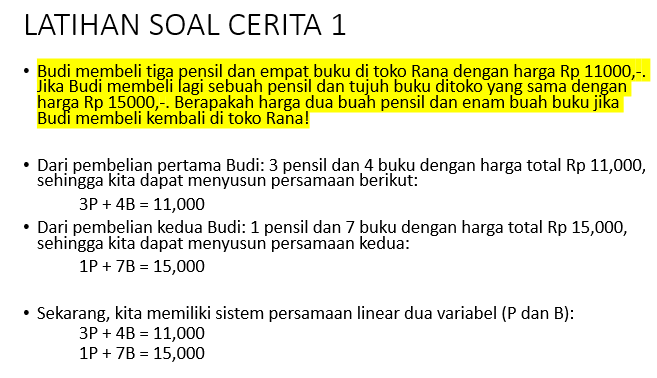

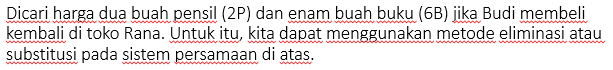

In [43]:
# Latihan Cerita 1

def linearProgrammingCerita(a,b):
  modelSoalCerita = pulp.LpProblem("ProfitMaximisingProblem", pulp.LpMaximize)
  # P = pensil, B = Buku
  P = pulp.LpVariable('P', lowBound=0, cat='Integer')
  B = pulp.LpVariable('B', lowBound=0, cat='Integer')

  modelSoalCerita += a[0] * P + a[1] * B == a[2]
  modelSoalCerita += b[0] * P + b[1] * B == b[2]
  modelSoalCerita.solve()
  return(P.varValue, B.varValue)

result = linearProgrammingCerita([3,4,11000], [1,7,15000])
print("Harga 1 Pensil (P) : ", result[0])
print("Harga 1 Buku (B) : ", result[1])

print("Harga dua buah pensil (2P) dan enam buah buku (6B) :", end=" ")
print("2P + 6B =", ((2*result[0]) + (6*result[1])))

Harga 1 Pensil (P) :  1000.0
Harga 1 Buku (B) :  2000.0
Harga dua buah pensil (2P) dan enam buah buku (6B) : 2P + 6B = 14000.0


---

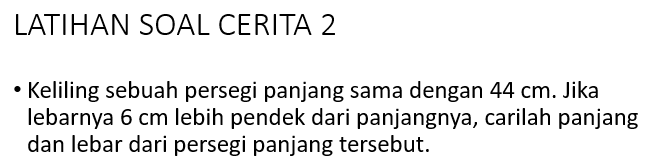

In [44]:
#Latihan Soal Cerita 2
keliling = pulp.LpProblem("ProfitMaximisingProblem", pulp.LpMaximize)
p = pulp.LpVariable('p', lowBound=0, cat='Integer')
l = pulp.LpVariable('l', lowBound=0, cat='Integer')
l = p - 6
keliling += 2 * (p + l) == 44
keliling.solve()

print("Panjang : ", p.varValue)
print("Lebar : ", p.varValue-6)

Panjang :  14.0
Lebar :  8.0


---

####Linear Programming dengan menggunakan SciPy

In [45]:
import numpy as np
from scipy.optimize import linprog

In [46]:
A = np.array([[1,0], [2,3], [1,1], [-1,0], [0,-1]])

In [47]:
b = np.array([16,19,8,0,0])

In [48]:
c = np.array([-5,-7])

In [49]:
res = linprog(c, A_ub=A, b_ub=b)

In [50]:
print('Optimal value:', round(res.fun*-1, ndigits=2),
      '\nx values:', res.x,
      '\nNumber of iterations performed:', res.nit,
      '\nStatus:', res.message)

Optimal value: 46.0 
x values: [5. 3.] 
Number of iterations performed: 3 
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [51]:
#koefisien fungsi tujuan (Z = 5x1 + 7x2)
c = [-5, -7]

#Koefisien matriks batasan
A = [
    [1,0], # 1x1 + 0x2 <= 16
    [2,3], # 2x1 + 3x2 <= 19
    [1,1]  # 1x1 + 1x2 <= 8
]

#Batasan kanan (rhs) dari masing-masing batasan
b = [16, 19, 8]

#Menentukan batasan variable x1 dan x2 sebagai variable non-negatif
x1_bounds = (0, None) # x1 >= 0
x2_bounds = (0, None) # x2 >= 0

# Gunakan linprog untuk menyelesaikan masalah pemrograman linear
result = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method="highs")

# Tampilkan hasilnya
print("Optimal Solution:")
print("x1 =", result.x[0])
print("x2 =", result.x[1])
print("Max Z =", -result.fun) # Karena tujuannya memaksimalkan -Z

Optimal Solution:
x1 = 5.0
x2 = 3.0
Max Z = 46.0


---

###Latihan dengan Scipy

Carilah nilai x dan y dari persamaan berikut masukan kedalam algoritma linear programming

1. 4x + 12y = 28

2. 2x + 2y = 21

3. Lisa dan Muri bekerja pada pabrik tas. Lisa dapat menyelesaikan 3 buah tas setiap jam dan Muri dapat menyelesaikan 4 tas setiap jam. Jumlah jam kerja Lisa dan Muri adalah 16 jam sehari dengan jumlah tas  yang dibuat oleh keduanya adalah 55 tas. jika jam kerja keduanya berbeda, tentukan jam kerja mereka masing-masing.

In [52]:
# function yang akan dipakai untuk nomor 1-2 (Disini saya hanya memodifikasi code slide 32)
from scipy.optimize import linprog

def linearProgrammingUseScipy(multiplicand, multiplier, product):
  c = [-multiplicand, -multiplier]

  A = [
      [multiplicand, multiplier]  # 4x + 12y <= 28
  ]

  b = [product]

  x_bounds = (0, None)  # x >= 0
  y_bounds = (0, None)  # y >= 0

  result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method="highs")

  print("Optimal Solution:")
  print("x =", result.x[0])
  print("y =", result.x[1])
  print("Min Z =", -result.fun)

In [53]:
# nomor 1. 4x + 12y = 28
linearProgrammingUseScipy(4, 12, 28)

Optimal Solution:
x = 7.0
y = 0.0
Min Z = 28.0


In [54]:
# nomor 2. 2x + 2y = 21
linearProgrammingUseScipy(2, 2, 21)

Optimal Solution:
x = 10.5
y = 0.0
Min Z = 21.0


In [55]:
# Berdasarkan studi kasus yang diberikan ditemukan persamaan :
# 3x + 4y = 55 dan x + y = 16

c = [-3, -4]

A = [[3, 4]]  # 3x + 4y = 55
A_eq = [[1, 1]]  # x + y = 16

b = [55]
b_eq = [16]

bounds = [(0, None), (0, None)]

result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

x = result.x[0]
y = result.x[1]
print("Optimal Solution:")
print(f"Jam kerja Lisa (x) =", x)
print(f"Jam kerja Muri (y) =", y)
print("Jumlah tas yang dibuat =", -result.fun)

Optimal Solution:
Jam kerja Lisa (x) = 9.0
Jam kerja Muri (y) = 7.0
Jumlah tas yang dibuat = 55.0
